In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [310]:
# Thiết lập dữ liệu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [311]:
# Lấy dữ liệu và đồng thời thiết lập ảnh 150x150
training=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dong',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 512 images belonging to 2 classes.


In [312]:
training.class_indices

{'Dong': 0, 'NoDong': 1}

In [313]:
x_train,y_train=next(training)
print(x_train.shape)
print(y_train.shape)

(32, 150, 150, 3)
(32, 2)


In [314]:
# Chuẩn hóa dữ liệu
x_train=x_train.reshape(32,67500)
x_train=x_train.astype ('float32')

In [367]:
# Tạo ra mạng ANN để train mô hình 
model=Sequential()
# Tạo lớp ẩn thứ nhất với 67500 tín hiệu vào và có 4 tín hiệu ra sử dụng hàm relu
model.add(Dense(64,activation='relu',input_shape=(67500,)))
# Tạo lớp ẩn thứ hai với 64 tín hiệu vào và có 64 tín hiệu ra sử dụng hàm relu
model.add(Dense(64,activation='relu'))
# Tạo lớp ẩn thứ ba với 64 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 64)                4320064   
                                                                 
 dense_155 (Dense)           (None, 64)                4160      
                                                                 
 dense_156 (Dense)           (None, 2)                 130       
                                                                 
Total params: 4,324,354
Trainable params: 4,324,354
Non-trainable params: 0
_________________________________________________________________


In [368]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣20 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=100, batch_size=32,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
1/1 [==============================] - 1s 904ms/step - loss: 0.8308 - accuracy: 0.5600 - val_loss: 0.8002 - val_accuracy: 0.7143
Epoch 2/100
1/1 [==============================] - 0s 82ms/step - loss: 0.2050 - accuracy: 0.9200 - val_loss: 128.7318 - val_accuracy: 0.4286
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 145.4381 - accuracy: 0.4400 - val_loss: 2.1082 - val_accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 93ms/step - loss: 2.3843 - accuracy: 0.5600 - val_loss: 43.9025 - val_accuracy: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 92ms/step - loss: 49.0547 - accuracy: 0.4400 - val_loss: 8.6312 - val_accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 9.0234 - accuracy: 0.5600 - val_loss: 14.0242 - val_accuracy: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 15.3169 - accuracy: 0.4400 - val_loss: 5.9192 - val_accuracy: 0.5714
Epoch 8/100

In [373]:
#Độ chính xác
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.014958960004150867
Train Accuracy 1.0


In [370]:
# Lưu dữ liệu đã train
model.save("ANN_Face1.h5")
model_ANN=load_model('ANN_Face1.h5')

[[0.9987821  0.00121796]]
ĐÂY LÀ ĐỒNG


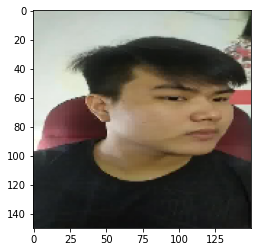

In [371]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Dong/Dong/BanDong (11).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
x =model_ANN.predict(img)
if result==1:
  prediction="KHÔNG PHẢI LÀ ĐỒNG"
if result==0:
  prediction="ĐÂY LÀ ĐỒNG"
print(x)
print(prediction)

[[0.00176584 0.99823415]]
KHÔNG PHẢI LÀ ĐỒNG


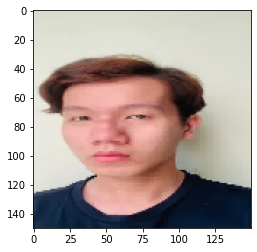

In [372]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Dong/NoDong/BanHau (19).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
x =model_ANN.predict(img)
if result==1:
  prediction="KHÔNG PHẢI LÀ ĐỒNG"
if result==0:
  prediction="ĐÂY LÀ ĐỒNG"
print(x)
print(prediction)